In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.datasets import load_iris
import requests
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import plot_partregress_grid

In [3]:
#read the data
df = pd.read_csv('local_data.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
y_data = df['CO2EMISSIONS']
x_data = df[['ENGINESIZE' , 'FUELCONSUMPTION_COMB_MPG' ,'CYLINDERS' ]]

In [5]:
#now we will split the data into training and testing data
x_train , x_test , y_train , y_test = train_test_split(x_data,y_data,test_size=0.2 , random_state=42)

In [6]:
#now we will train the model
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)


LinearRegression()

In [7]:
#predicting the values of y
y_hat = regr.predict(x_test)    

In [8]:
#checking the accuracy of the model
print('R2 score is : ' , r2_score(y_test , y_hat))


R2 score is :  0.8945399101197005


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

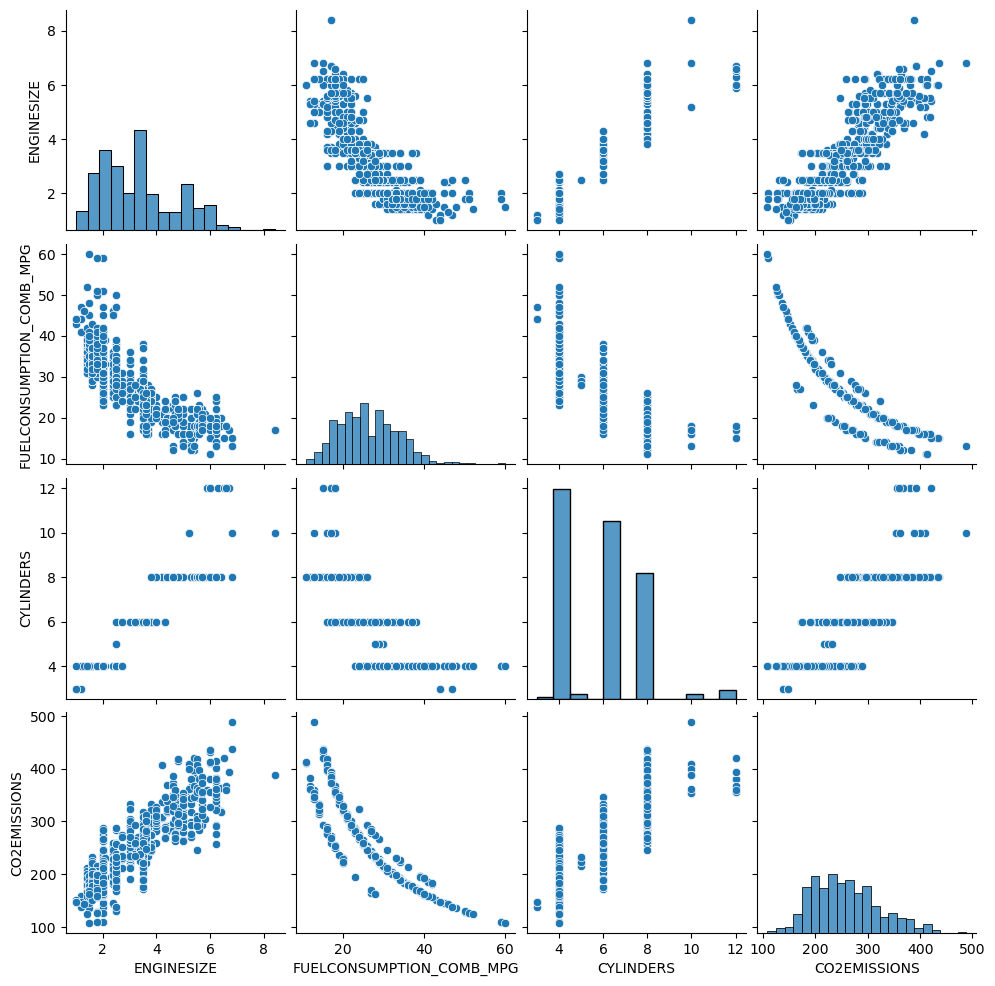

In [9]:
#after I have trained the model I will now plot the data
sns.pairplot(df, vars=['ENGINESIZE', 'FUELCONSUMPTION_COMB_MPG', 'CYLINDERS', 'CO2EMISSIONS'])
plt.show()



c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (

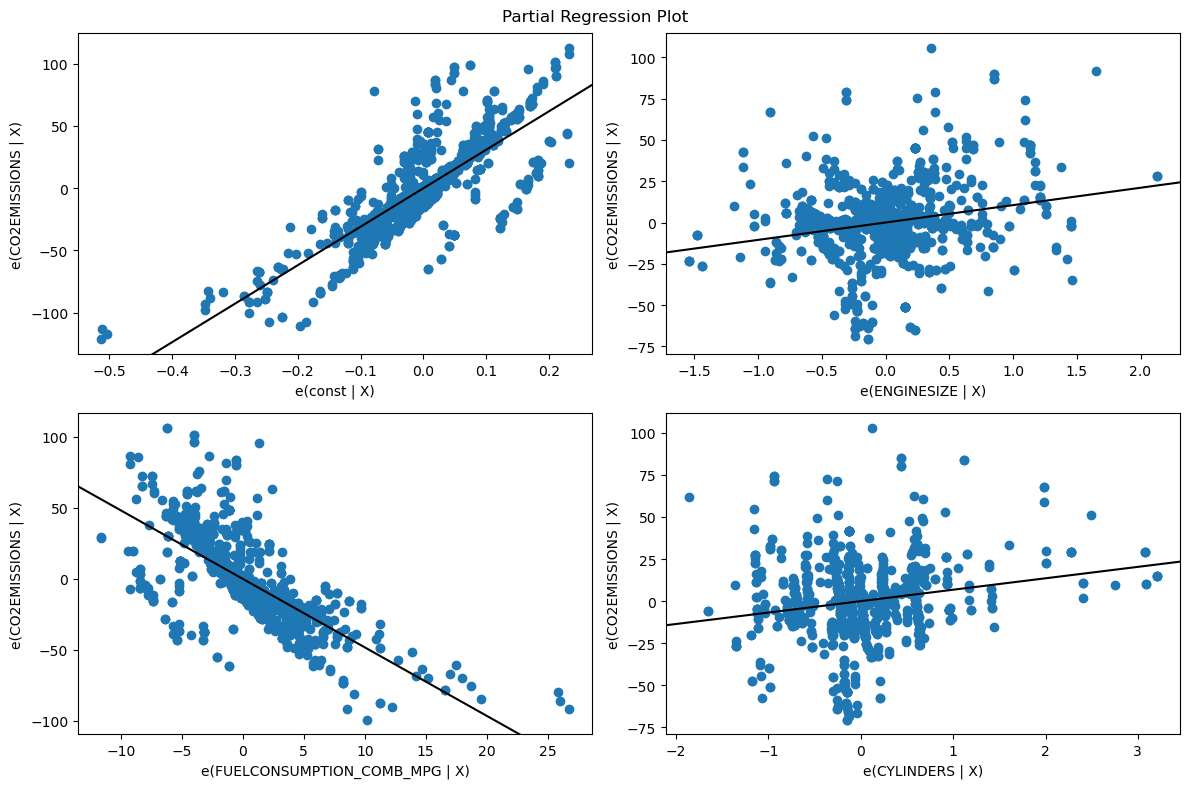

In [10]:
# Partial regression plots
X = sm.add_constant(x_data)
fig = plt.figure(figsize=(12, 8))
plot_partregress_grid(sm.OLS(y_data, X).fit(), fig=fig)
plt.show()

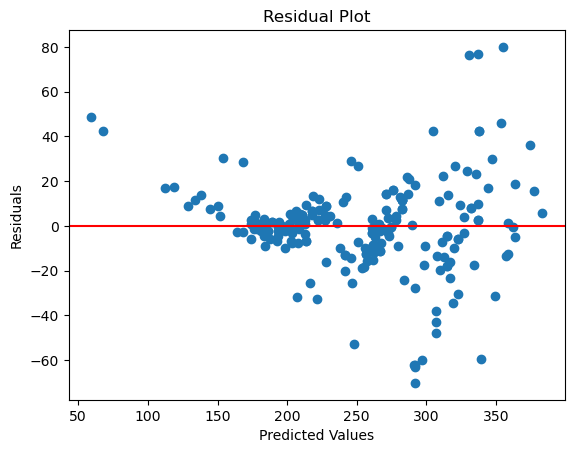

In [11]:
# Residual plots
residuals = y_test - y_hat
plt.scatter(y_hat, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

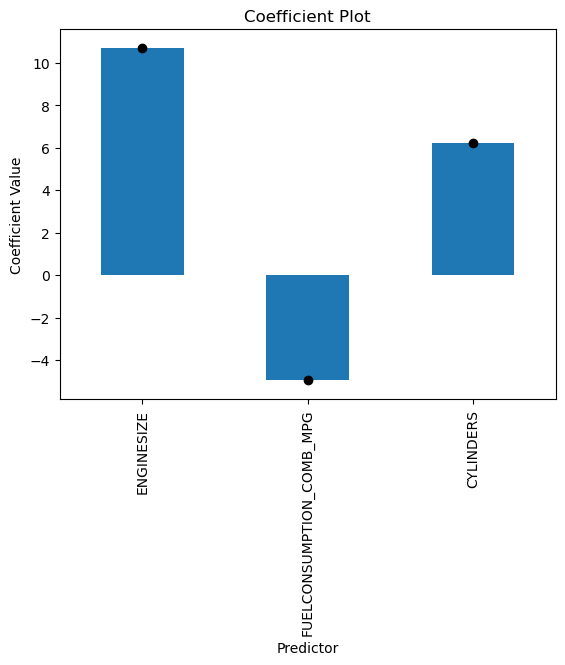

In [12]:
# Coefficient plot
coefs = regr.coef_
coef_df = pd.DataFrame({'Predictor': ['ENGINESIZE', 'FUELCONSUMPTION_COMB_MPG', 'CYLINDERS'], 'Coefficient': coefs})
coef_df.plot(x='Predictor', y='Coefficient', kind='bar', legend=False)
plt.errorbar(coef_df['Predictor'], coef_df['Coefficient'], yerr=[0.1, 0.1, 0.1], fmt='o', color='black')  # Example error bars
plt.ylabel('Coefficient Value')
plt.title('Coefficient Plot')
plt.show()


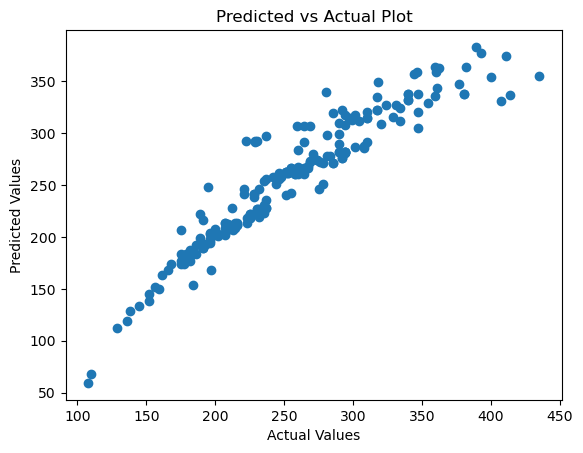

In [13]:
# Predicted vs Actual Plot
plt.scatter(y_test, y_hat)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Plot')
plt.show()

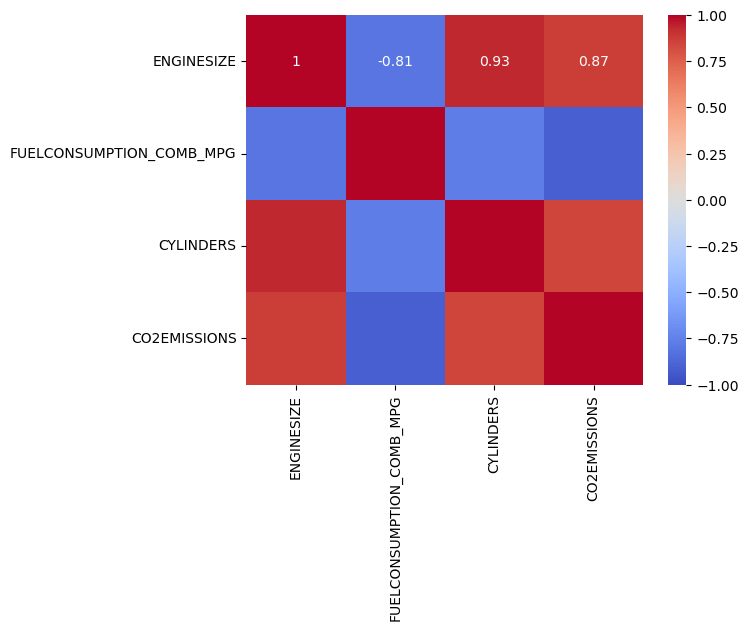

In [15]:
# Correlation matrix
sns.heatmap(x_data.join(y_data).corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()